## Predicting the Image by using Saved model

In [25]:
import torch
import torch.nn as nn
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt

Initializing out autoencoder architecture

In [26]:
class ColorAutoEncoder(nn.Module):
    def __init__(self):
        super().__init__()
        
        # Encoder (Downsampling)
        self.encoder = nn.Sequential(
            nn.Conv2d(1, 32, 3, stride=1, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(32),
            nn.Conv2d(32, 64, 3, stride=2, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(64),
            nn.Conv2d(64, 128, 3, stride=2, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(128),
            nn.Conv2d(128, 256, 3, stride=2, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(256),
            nn.Conv2d(256, 512, 3, stride=2, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(512)
        )
        
        # Decoder (Upsampling)
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(512, 256, 3, stride=2, padding=1, output_padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(256),
            nn.ConvTranspose2d(256, 128, 3, stride=2, padding=1, output_padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(128),
            nn.ConvTranspose2d(128, 64, 3, stride=2, padding=1, output_padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(64),
            nn.ConvTranspose2d(64, 32, 3, stride=2, padding=1, output_padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(32),
            nn.ConvTranspose2d(32, 3, 3, stride=1, padding=1),
            nn.Sigmoid()
        )

    def forward(self, x):
        # Encoder
        x = self.encoder(x)
        
        # Decoder
        x = self.decoder(x)
        
        return x

### Code to Compare Original image with predicted one

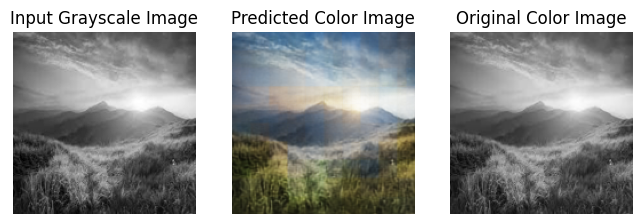

In [27]:
# Load the saved model
model = ColorAutoEncoder()
model.load_state_dict(torch.load('models/landscape_model_epoch_30.pth'))

model.eval()

# Preprocess the input image
transform = transforms.Compose([
    transforms.Resize((160, 160)),
    transforms.ToTensor(),
])

input_ori_path = 'predict_img/3.jpg'
input_gray = Image.open(input_ori_path).convert('L')  # Convert to grayscale
input_gray = transform(input_gray).unsqueeze(0)  # Add batch dimension

original_color = Image.open(input_ori_path)
original_color = transform(original_color).unsqueeze(0)

# Make prediction
with torch.no_grad():
    predicted_color = model(input_gray)

# Visualize the images
plt.figure(figsize=(8, 4))

plt.subplot(1, 3, 1)
plt.imshow(input_gray.squeeze().numpy(), cmap='gray')
plt.title('Input Grayscale Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(predicted_color.squeeze().permute(1, 2, 0).numpy())
plt.title('Predicted Color Image')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(original_color.squeeze().permute(1, 2, 0).numpy())
plt.title('Original Color Image')
plt.axis('off')

plt.show()

### Function for converting grayscale into predicted color image

In [28]:
def predict_img(input_gray):
    # Load the saved model
    model = ColorAutoEncoder()
    model.load_state_dict(torch.load('models/landscape_model_epoch_30.pth'))

    model.eval()

    transform = transforms.Compose([
        transforms.Resize((160, 160)),
        transforms.ToTensor(),
    ])

    input_gray = input_gray.convert('L')
    input_gray = transform(input_gray).unsqueeze(0)  # Add batch dimension

    # Make prediction
    with torch.no_grad():
        predicted_color = model(input_gray)

        return predicted_color, input_gray

#### Calling the function

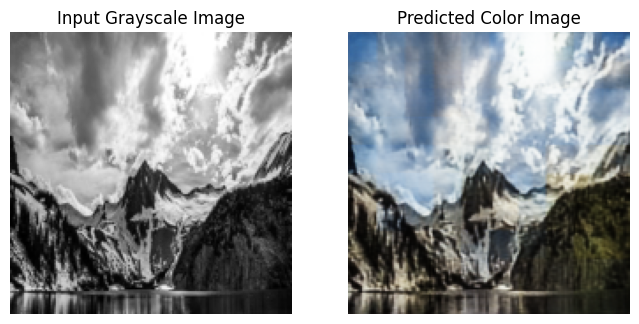

In [29]:
input_img = 'predict_img/2.jpeg'
input_gray = Image.open(input_img)

output_img, input_gray = predict_img(input_gray)

# Visualize the images
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.imshow(input_gray.squeeze().numpy(), cmap='gray')
plt.title('Input Grayscale Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(output_img.squeeze().permute(1, 2, 0).numpy())
plt.title('Predicted Color Image')
plt.axis('off')

plt.show()